# Wine Quality

### Visualization

- Create correlation heatmaps to identify relationships between features.

- Plot feature distributions to understand their individual characteristics.

- Visualize class distributions and compare them before and after applying SMOTE.

In [1]:
import zipfile
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define file paths
zip_file_path = 'Wine Quality Dataset.zip'
extracted_folder = 'Wine_Quality_Data'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Load the Wine Quality CSV into a DataFrame
csv_file_name = os.path.join(extracted_folder, 'WineQT.csv')
df = pd.read_csv(csv_file_name)

# Data Exploration: Display the first few rows
print(df.head())
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check the unique values in the 'quality' column
print(f"Unique values in 'quality' column: {df['quality'].unique()}")

# Impute missing values (if any) using median for numerical columns
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Check if any missing values remain
print(df_imputed.isnull().sum())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [3]:
# Data Preprocessing

# Define the features (X) and target (y)
X = df_imputed.drop(['quality', 'Id'], axis=1)  # Drop 'quality' and 'Id' columns
y = df_imputed['quality']  # Target column (quality of the wine)

# Normalize the numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # This will normalize the features

# Convert the scaled features into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Perform PCA for feature selection (optional) to reduce highly correlated features
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled_df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Check the dimensions of the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (914, 9)
Test data shape: (229, 9)


Class distribution after SMOTE: quality
7.0    387
6.0    387
5.0    387
8.0    387
4.0    387
3.0    387
Name: count, dtype: int64


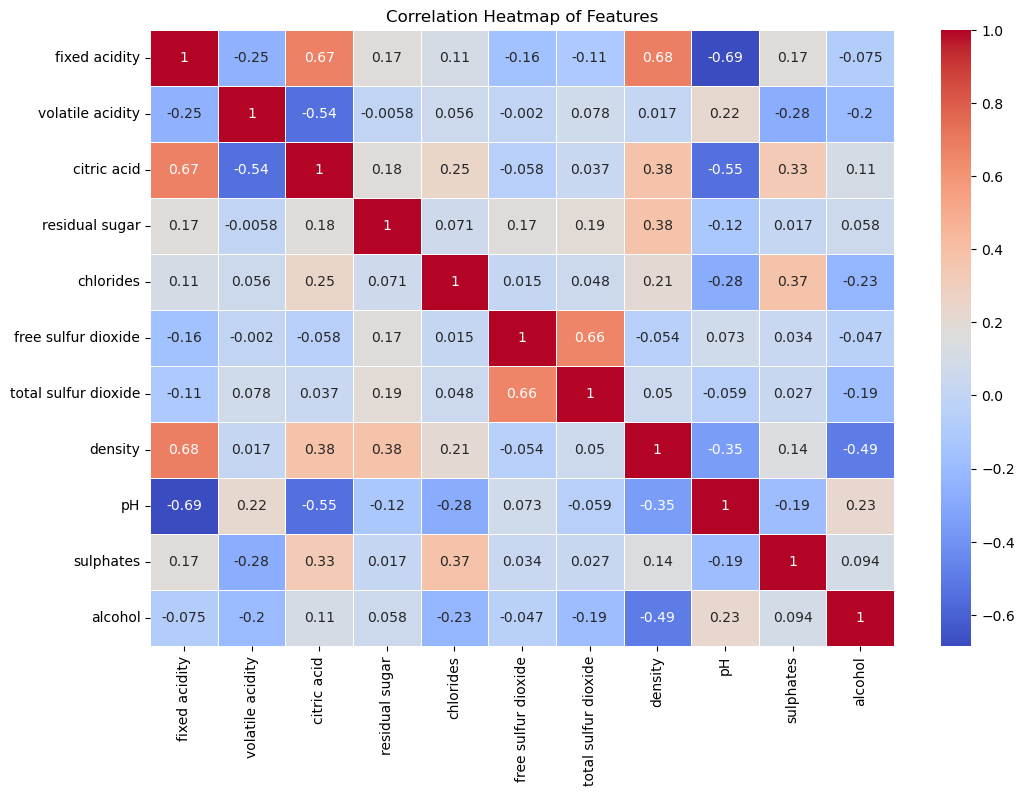

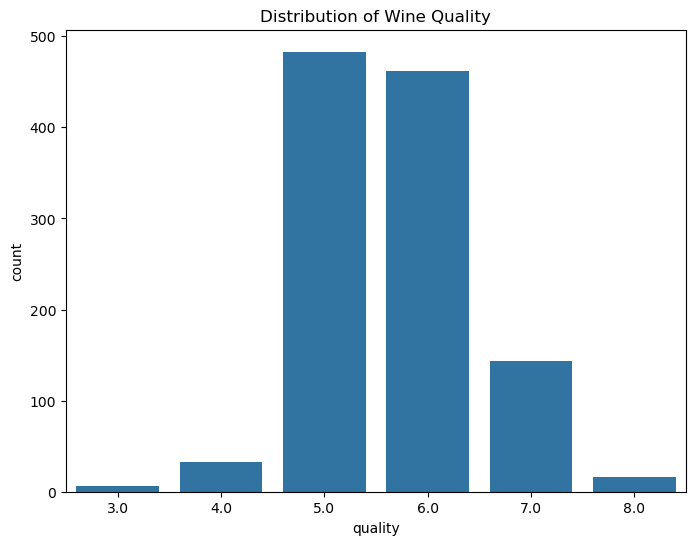

In [4]:
# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the balance of the classes after resampling
print(f"Class distribution after SMOTE: {y_train_res.value_counts()}")

# Visualize correlations (Optional)
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_scaled_df).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# Visualize the distribution of wine quality (Optional)
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df_imputed)
plt.title("Distribution of Wine Quality")
plt.show()

# Now your data is ready for model training or further analysis.

### Future Work

Model Building: Develop and compare various machine learning models, including:

- Logistic Regression
- Random Forest
- XGBoost

Hyperparameter Tuning: Perform hyperparameter optimization to enhance model performance.

Feature Selection: Experiment with feature selection techniques to identify the most influential features.

Advanced Evaluation: Use metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to evaluate the classification models.